In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

BA_gossip_m=05_N=1000_B=0.20_g=0.05.csv
100


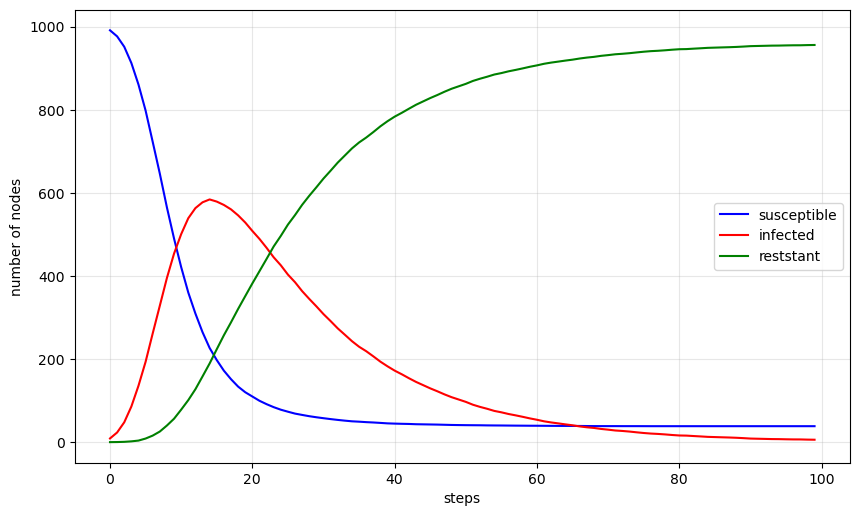

BA_gossip_m=05_N=1000_B=0.05_g=0.20.csv
100


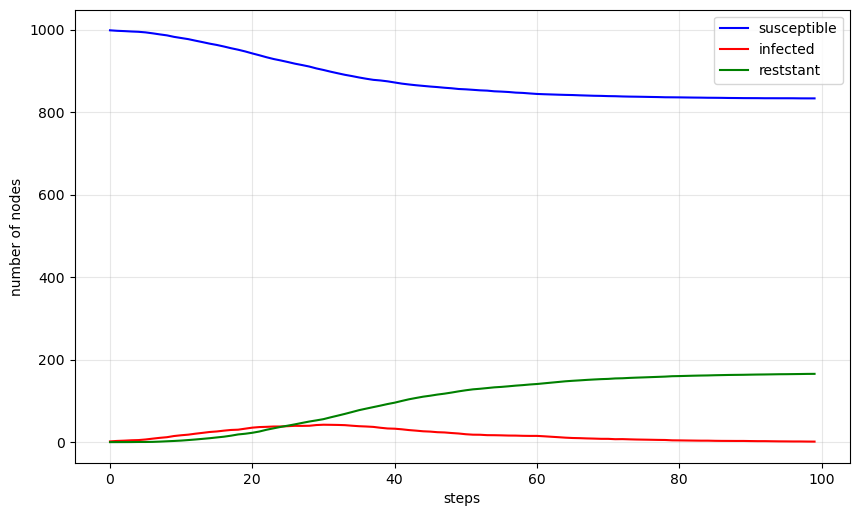

ER_SIR_p=0.05_N=1000_B=0.20_g=0.20.csv
100


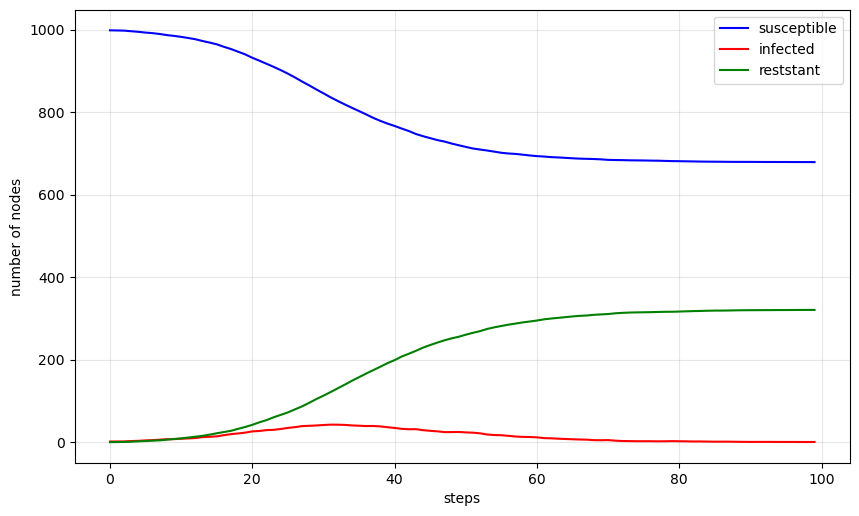

BA_SIR_m=05_N=100_B=0.20_g=0.20.csv
100


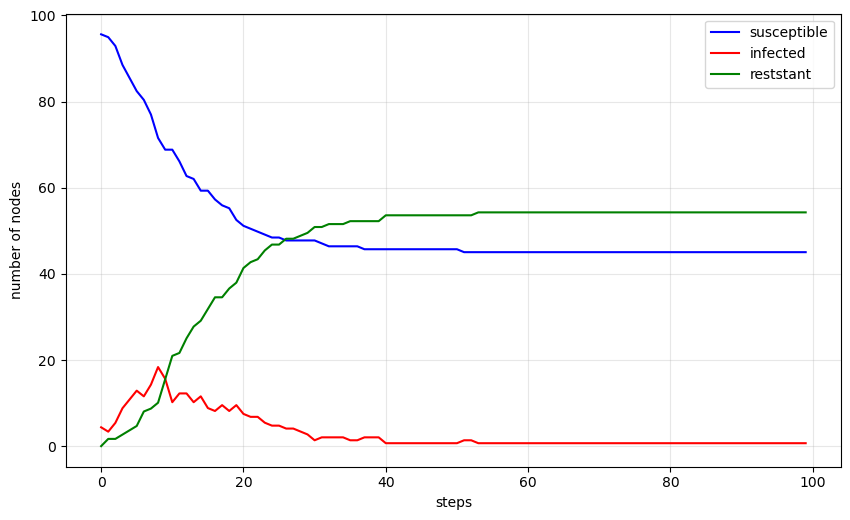

ER_gossip_p=0.05_N=1000_B=0.20_g=0.20.csv
100


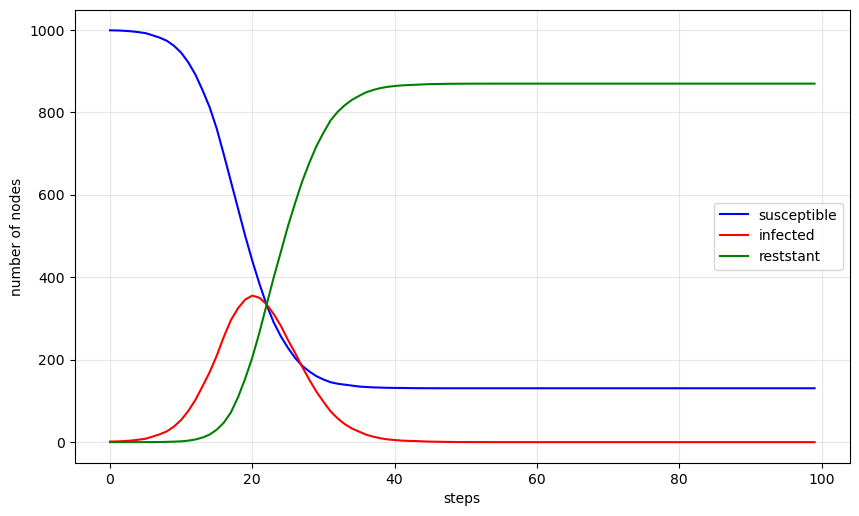

ER_SI_p=0.05_N=1000_B=0.10.csv
100


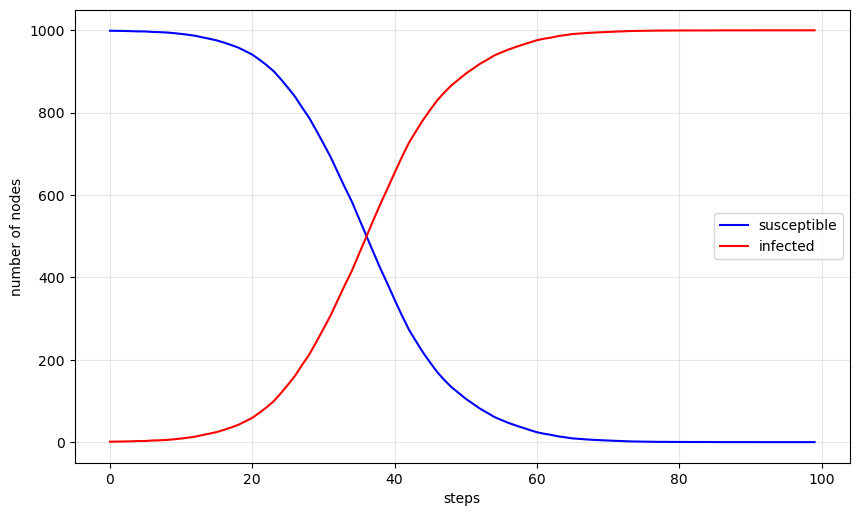

BA_SI_m=05_N=1000_B=0.10.csv
100


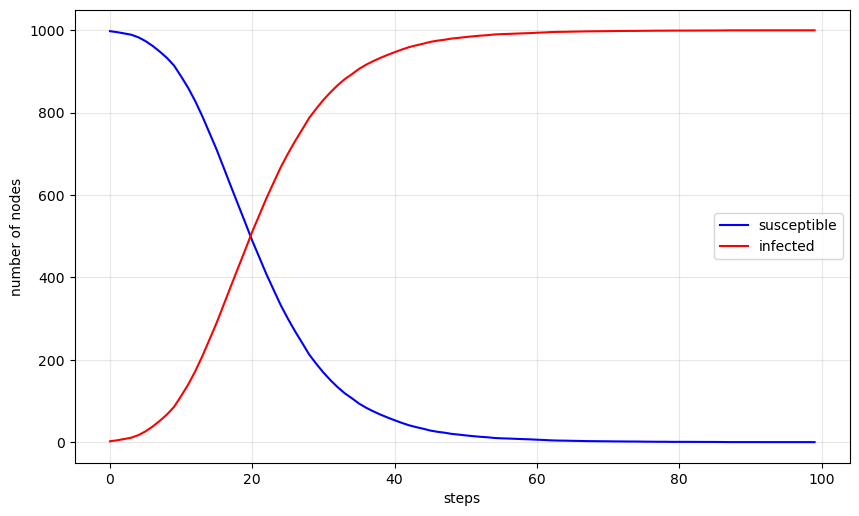

ER_gossip_p=0.05_N=1000_B=0.05_g=0.20.csv
100


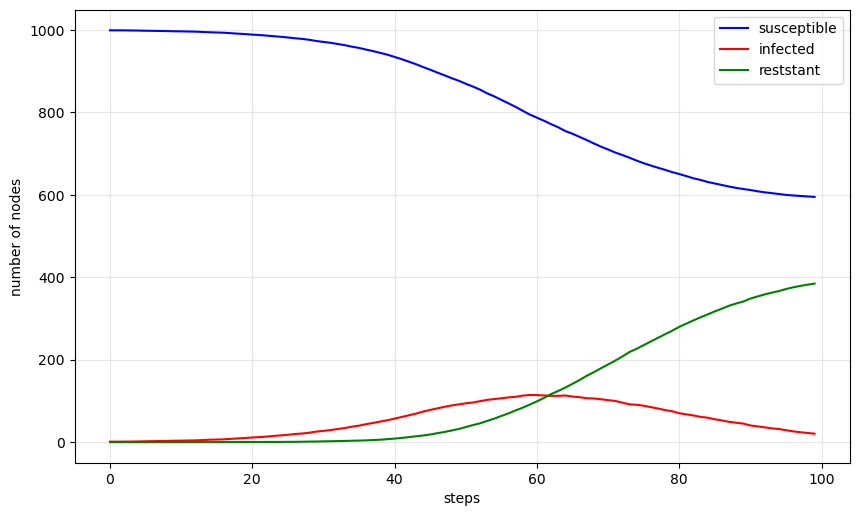

ER_gossip_p=0.05_N=1000_B=0.20_g=0.05.csv
100


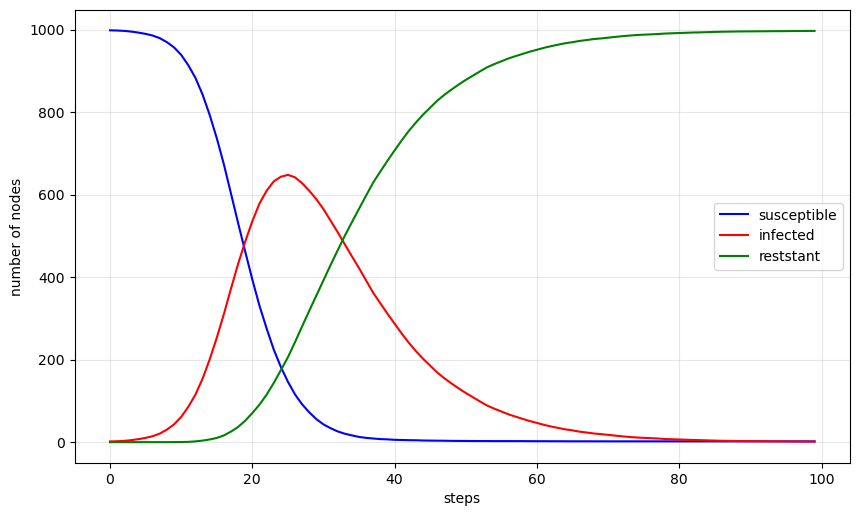

BA_SIR_m=05_N=100_B=0.20_g=0.05.csv
100


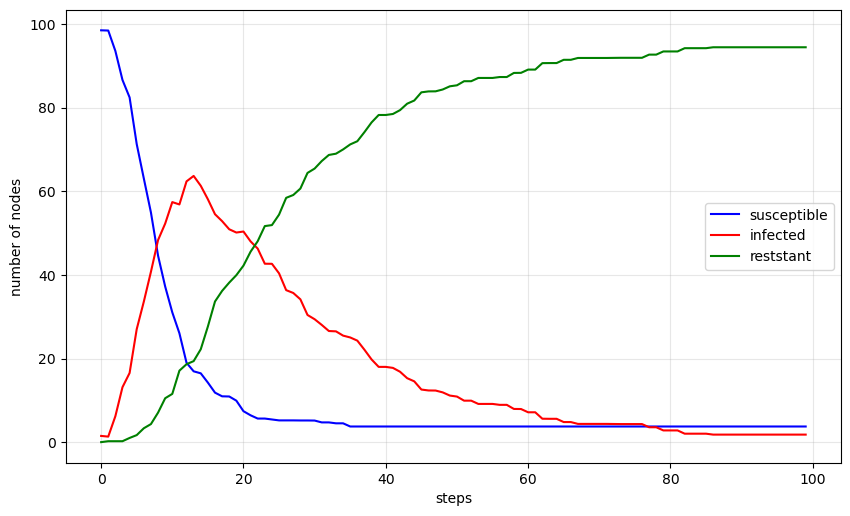

BA_SI_m=05_N=1000_B=0.40.csv
100


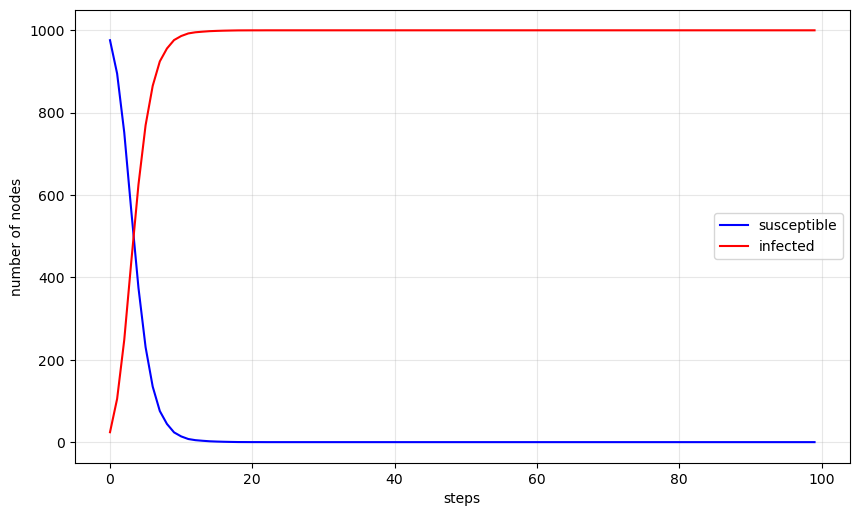

BA_SIR_m=05_N=100_B=0.05_g=0.20.csv
100


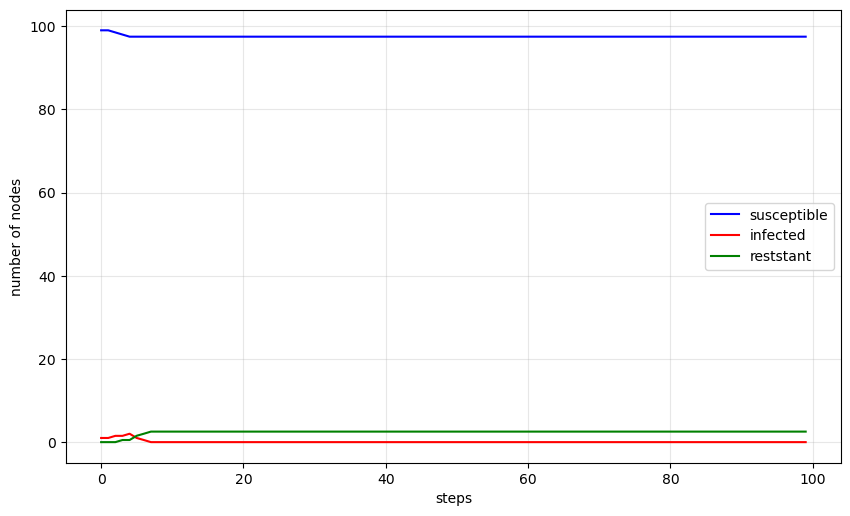

ER_SIR_p=0.05_N=1000_B=0.20_g=0.05.csv
100


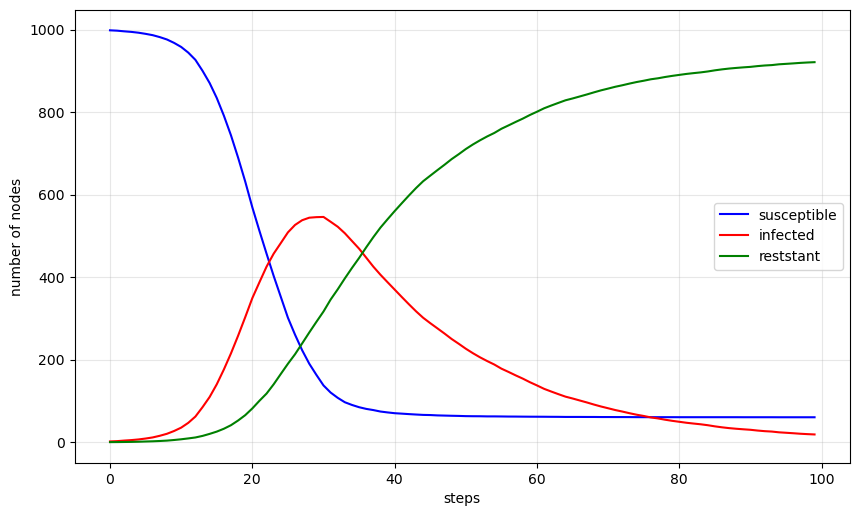

ER_SIR_p=0.05_N=1000_B=0.05_g=0.20.csv
100


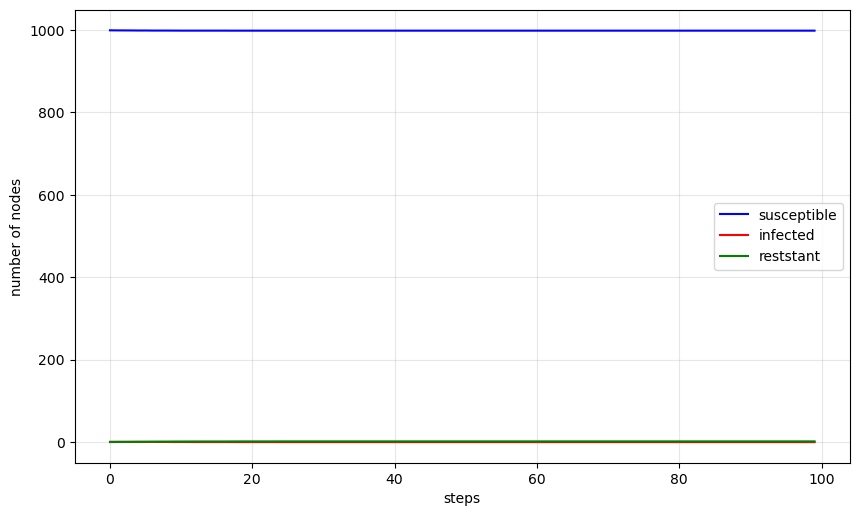

ER_SI_p=0.05_N=1000_B=0.40.csv
100


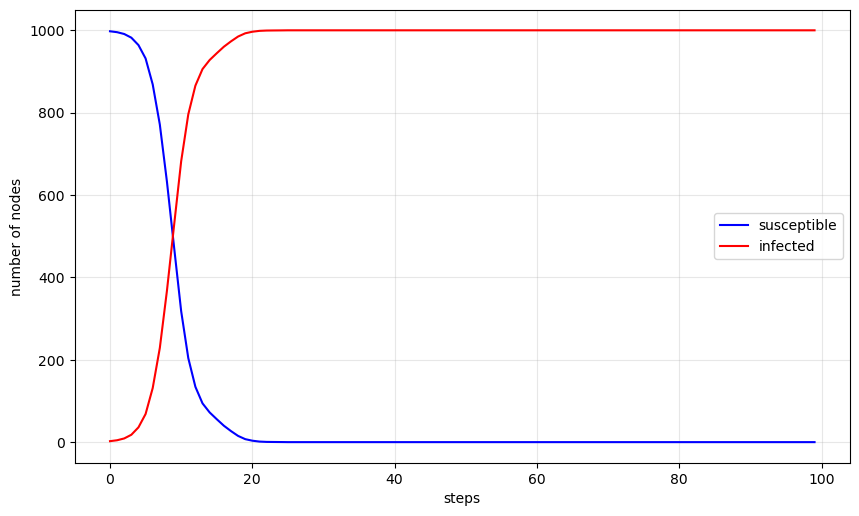

BA_gossip_m=05_N=1000_B=0.20_g=0.20.csv
100


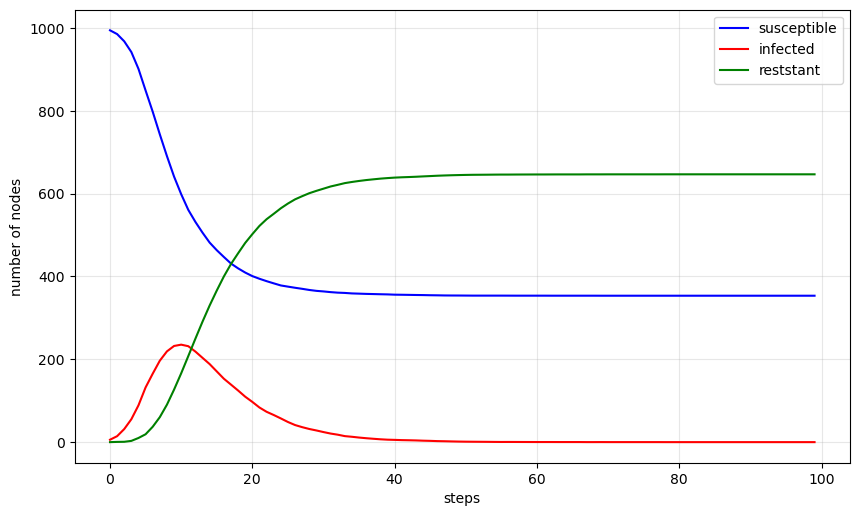

In [75]:
for filename in os.listdir("data"):
    if not filename.startswith('.'):
        print(filename)

        results = pd.read_csv(os.path.join("data", filename))

        if_si = "SI_" in filename
        if_sir = "SIR" in filename
        if_gossip = "gossip" in filename
        if not if_si and not if_sir and not if_gossip: continue
        if if_si: results.columns = ['step', 'sus', 'inf']
        elif if_sir or if_gossip: results.columns = ['step', 'sus', 'inf', 'res']

        group = results.groupby('step')
        sus_mean = group.agg({'sus': ['mean']})
        inf_mean = group.agg({'inf': ['mean']})
        if if_sir or if_gossip: res_mean = group.agg({'res': ['mean']})
        
        max_step = pd.Series(results.max()).values[0]+1
        print(max_step)
        steps = np.array(range(0, max_step))
        
        fig, (ax) = plt.subplots(nrows=1, figsize=(10,6), dpi=100)
        ax.plot(steps, sus_mean, color='blue', label='susceptible')
        ax.plot(steps, inf_mean, color='red', label='infected')
        if if_sir or if_gossip: ax.plot(steps, res_mean, color='green', label='reststant')
        ax.legend()

        ax.grid(alpha=0.3)
        ax.set_xlabel('steps')
        ax.set_ylabel('number of nodes')

        image_file = ('images/')+filename.removesuffix('csv') + ('png')
        plt.savefig(image_file, transparent=True, bbox_inches='tight')
        plt.show()